# <font color='#2F4F4F'>AfterWork Data Science: Recurrent Neural Networks with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understanding </font>

### a) Specifying the Research Question

Build a recurrent neural networks model that will be used to predict Tesla stock prices in 2017 using data from 2012-2016

### b) Defining the Metric for Success

Build a neural networks regression model with an RSME  less than 10% of the target mean.

### c) Understanding the Context 

Stockpy is an innovative fintech enabling financial prosperity for the entire population. It is a venture funded startup based in Palo Alto bringing world-class financial experiences to a continually growing customer base. As Stockpy enters an expansion phase for innovative fintech product offerings, it aims to enhance the enormous value in data processing and analysis for continuous growth and success.

As a Finance Data Scientist for Stockpy, you provide leadership to turn cutting-edge technology into actionable insights; unlocking the power of data that provides value to business decisions and customer service enhancements.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings and Recommendation
* Challenging the Solution


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [5]:
# Importing standard libraries
# ---
# 
import pandas as pd              
import numpy as np               
import matplotlib.pyplot as plt 

In [6]:
# Importing our dataset
# ---
#
df_train=pd.read_csv("https://bit.ly/38dSbSb")

df_train.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,5.788,5.900,5.530,5.616,5.616,4640500
1,2012-01-04,5.642,5.734,5.500,5.542,5.542,3150500
2,2012-01-05,5.552,5.586,5.370,5.424,5.424,5027500
3,2012-01-06,5.440,5.558,5.282,5.382,5.382,4931500
4,2012-01-09,5.400,5.498,5.224,5.450,5.450,4485000


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [23]:
# Sample dataset
# ---
df_train.sample(5)


,Date,Open,High,Low,Close,Adj Close,Volume
735,2014-12-04,45.720001,46.180000,45.562000,45.655998,45.655998,19278000
566,2014-04-04,45.202000,45.653999,42.250000,42.445999,42.445999,56728000
1208,2016-10-20,40.424000,40.599998,39.410000,39.820000,39.820000,25364500
1204,2016-10-14,40.132000,40.285999,39.259998,39.301998,39.301998,21349500
654,2014-08-11,51.096001,52.748001,51.000000,51.863998,51.863998,40506500


In [8]:
# Statistical summary
# ---
#
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,31.997898,32.558671,31.403696,31.989245,31.989245,2.551310e+07
std,16.911515,17.148543,16.649245,16.903500,16.903500,2.259037e+07
min,5.324000,5.370000,4.528000,4.558000,4.558000,1.824500e+06
25%,8.403000,8.556000,8.197000,8.379500,8.379500,1.059400e+07
50%,39.411000,40.123998,38.709000,39.427000,39.427000,2.007650e+07
75%,45.214499,45.934999,44.303000,45.076502,45.076502,3.245150e+07
max,57.534000,58.284000,56.080002,57.208000,57.208000,1.858195e+08


## <font color='#2F4F4F'>Step 4. Data Preparation</font>

In [9]:
# Getting our train dataset
# ---
#
train_set = df_train.iloc[:, 1:2].values
print(train_set)

[[ 5.788   ]
 [ 5.642   ]
 [ 5.552   ]
 ...
 [44.306   ]
 [43.712002]
 [43.259998]]


In [10]:
# Performing Feature scaling
# ---
#
from sklearn.preprocessing import MinMaxScaler
sc =  MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_set)
print(train_set_scaled)

[[0.00888719]
 [0.00609079]
 [0.00436698]
 ...
 [0.74663857]
 [0.73526148]
 [0.72660406]]


In [11]:
# Creating a dataset with 60 timesteps and 1 output
# ---
#
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
# Reshaping 
# ---
#
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

In [13]:

# import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [14]:
#Initialize RNN

regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

# Adding the output layer

regressor.add(Dense(units = 1))

In [15]:
# Compile the RNN 

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [16]:
# Fitting the RNN to the training set
# ---
#
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 60ms/step - loss: 0.0404
Epoch 2/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0100
Epoch 3/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0080
Epoch 4/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0078
Epoch 5/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0072
Epoch 6/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0067
Epoch 7/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0061
Epoch 8/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0060
Epoch 9/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0070
Epoch 10/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0062
Epoch 11/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0060
Epoch 12/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0055
Epoch 13/100
38/38 [====

In [17]:
# Making predictions: Getting the predicted stock price for 2017
# ---
#get test dataset

df_test=pd.read_csv("tslatest.csv")
df_test.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500
1,2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500
2,2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500
3,2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500
4,2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500
5,2017-01-10,46.400002,46.400002,45.377998,45.973999,45.973999,18300000
6,2017-01-11,45.813999,45.995998,45.335999,45.945999,45.945999,18254000
7,2017-01-12,45.812000,46.139999,45.116001,45.917999,45.917999,18951000
8,2017-01-13,46.000000,47.570000,45.917999,47.549999,47.549999,30465000
9,2017-01-17,47.340000,47.992001,46.874001,47.116001,47.116001,23087500


In [34]:


real_price = df_test.iloc[:, 1:2].values




# Getting the Predicted Stock Price of 2017

#
dataset = pd.concat((df_train['Open'],
                           df_test['Open']), axis=0)

#
inputs = dataset[len(dataset)-len(df_test)-60:].values

# Reshaping the inputs to have only 1 column
# ---
#
inputs = inputs.reshape(-1, 1)


# Using the scale set by the training set to scale the test inputs
# ---
#
inputs = sc.transform(inputs)

# Then creating the test data structure just as we did for the train dataset
# ---

X_test = []
y_test = []

for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])

X_test, y_test  = np.array(X_test), np.array(y_test)  
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# Making our Predictions
# ---
#
predicted_price = regressor.predict(X_test)


predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price)

[[43.520947]
 [43.20457 ]
 [42.869595]
 [43.407917]
 [44.349083]
 [45.168552]
 [45.749165]
 [45.79865 ]
 [45.588753]
 [45.459103]
 [45.918217]
 [46.526764]
 [47.661816]
 [48.449596]
 [48.687984]
 [48.9161  ]
 [49.676846]
 [50.139782]
 [49.98994 ]
 [49.762188]
 [49.41297 ]
 [49.47743 ]
 [49.366695]
 [49.458252]
 [49.53943 ]
 [50.114197]
 [50.584045]
 [51.462402]
 [52.40863 ]
 [52.957554]
 [53.798374]
 [54.449833]
 [54.46307 ]
 [53.219643]
 [53.039536]
 [53.915688]
 [53.300262]
 [51.44291 ]
 [49.700733]
 [48.52518 ]
 [48.841877]
 [49.380737]
 [49.65668 ]
 [49.390907]
 [49.285965]
 [48.96119 ]
 [48.711468]
 [48.523094]
 [48.34492 ]
 [48.34283 ]
 [49.259884]
 [50.664173]
 [51.6718  ]
 [51.669933]
 [51.474575]
 [50.481182]
 [49.96671 ]
 [50.007217]
 [50.67588 ]
 [52.683548]
 [54.35431 ]
 [54.79038 ]
 [54.58192 ]
 [55.074497]
 [56.63287 ]
 [58.2635  ]
 [58.330475]
 [57.905357]
 [58.836834]
 [60.20129 ]
 [60.04584 ]
 [58.495956]
 [58.119007]
 [58.094364]
 [58.52429 ]
 [59.24246 ]
 [59.063396]

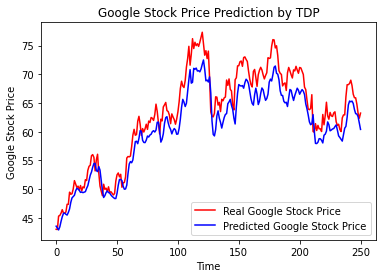

In [31]:
# Visualizing the results
# ---
#
#
plt.plot(real_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_price, color='blue',
         label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction by TDP')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [32]:
# Model Evaluation

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_price, predicted_price))
print(rmse)

3.2001526975291408


## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

- The RMSE value obtained is 3.2 which is almost 10% of the target mean (31.99). This means the model is of high performance

- The visualization on real and predicted values shows a similar pattern, indicating a high model accuracy

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

#### a) Did we have the right question?
Yes


#### b) Did we have the right data?
Yes, the data we had was sufficient in answering the research question


#### c) What can be done to improve the solution?

The model performance can be improved through:

- Training with more data
- Adding more LSTM layers
- Increasing the timesteps
- Adding some other indicators
- Adding more neurons in the LSTM layers

